In [52]:
import os
from random import random, randint
from mlflow import log_metric, log_param, log_artifacts

# if __name__ == "__main__":
#     # Log a parameter (key-value pair)
#     log_param("param1", randint(0, 100))

#     # Log a metric; metrics can be updated throughout the run
#     log_metric("foo", random())
#     log_metric("foo", random() + 1)
#     log_metric("foo", random() + 2)

#     # Log an artifact (output file)
#     if not os.path.exists("outputs"):
#         os.makedirs("outputs")
#     with open("outputs/test.txt", "w") as f:
#         f.write("hello world!")
#     log_artifacts("outputs")

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
pv_df = pd.read_pickle('pv_apps.pkl')

In [55]:
pv_df.columns.values

array(['application id', 'preceding id', 'superceding id',
       'matched csi application number', 'application status', 'utility',
       'service city', 'service zip', 'service county', 'technology type',
       'system size dc', 'system size ac', 'storage capacity (kwh)',
       'storage size (kw ac)', 'inverter size (kw ac)', 'tilt', 'azimuth',
       'mounting method', 'tracking', 'customer sector',
       'app received date', 'app complete date', 'app approved date',
       'decommissioned date', 'self installer', 'installer name',
       'installer phone', 'installer city', 'installer state',
       'installer zip', 'cslb number', 'third party owned',
       'third party owned type', 'third party name', 'pace financed',
       'pace financier', 'electric vehicle', 'electric vehicle count',
       'system output monitoring', 'system output reports to vendor?',
       'system output monitoring provider', 'total system cost',
       'itc cost basis', 'cost/watt', 'nem tariff',
   

In [56]:
pv_df.head(4)

,application id,preceding id,superceding id,matched csi application number,application status,utility,service city,service zip,service county,technology type,...,inverter model 7,inverter manufacturer 7,inverter quantity 7,inverter model 8,inverter manufacturer 8,inverter quantity 8,inverter model 9,inverter manufacturer 9,inverter quantity 9,time_to_approval
0,PGE-INT-106960608,NaN,NaN,NaN,Interconnected,PGE,NaN,nan,BUTTE,pv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307 days
1,PGE-INT-106960610,NaN,PGE-INT-114660819,NaN,Interconnected,PGE,NaN,nan,SAN MATEO,pv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37 days
3,PGE-INT-106960621,NaN,NaN,NaN,Interconnected,PGE,NaN,nan,SAN FRANCISCO,pv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1046 days
4,PGE-INT-106960670,PGE-INT-113318949,PGE-INT-114200704,NaN,Interconnected,PGE,NaN,nan,MONTEREY,pv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301 days


In [57]:
x = pv_df['utility'].value_counts()

Text(0, 0.5, 'Application Count')

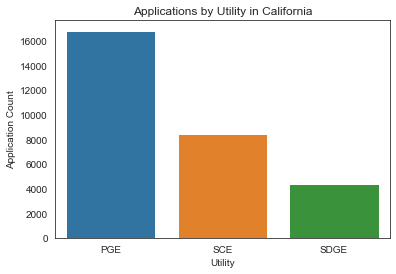

In [58]:
sns.barplot(x.index,x.values)
plt.title("Applications by Utility in California")
plt.xlabel("Utility")
plt.ylabel("Application Count")

In [59]:
pv_df['time_to_approval'] = pv_df['time_to_approval'].dt.days

In [60]:
ut = pv_df.groupby(['utility'])['time_to_approval'].mean()

Text(0, 0.5, 'Days (avg.)')

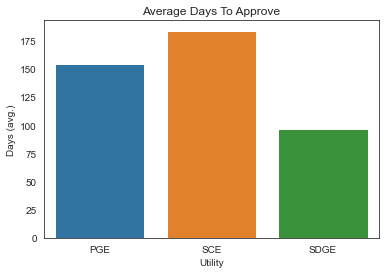

In [61]:
sns.barplot(ut.index,ut.values)
plt.title("Average Days To Approve")
plt.xlabel("Utility")
plt.ylabel("Days (avg.)")

In [62]:
dc = pv_df.groupby(["utility"])['system size dc'].mean()

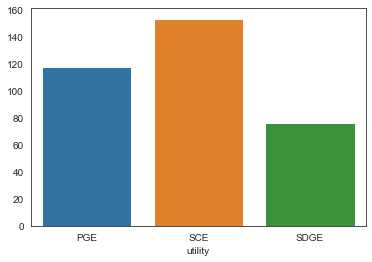

In [63]:
sns.barplot(dc.index,dc.values)

In [64]:
pv_df["system size dc"].corr(pv_df['time_to_approval'])

0.3176727923138562

In [65]:
sns.set_style("white")

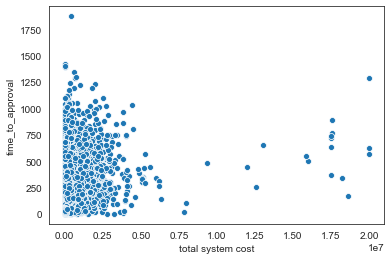

In [66]:
sns.scatterplot(x="total system cost",y="time_to_approval",data=pv_df)

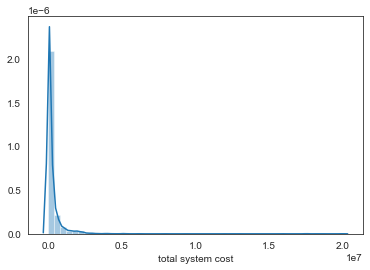

In [67]:
sns.distplot(pv_df["total system cost"])

In [68]:
pv_df['total system cost'].max()

20000000.0

In [69]:
pv_df["third party owned type"].value_counts()

PPA               3314
Lease              334
Other              281
Pre-paid Lease      28
Pre-Paid Lease      12
Name: third party owned type, dtype: int64

In [70]:
pv_df["system output monitoring"].value_counts()

Yes    13583
No      4967
YES        1
Name: system output monitoring, dtype: int64

In [71]:
pv_df["mounting method"].value_counts()

Rooftop    15903
Ground      3449
Mixed        918
Name: mounting method, dtype: int64

In [72]:
mount = pv_df.groupby(["mounting method"])["time_to_approval"].mean()

In [73]:
mount

mounting method
Ground     243.714410
Mixed      352.324619
Rooftop    126.482488
Name: time_to_approval, dtype: float64

In [74]:
pv_df["tracking"].value_counts()

Fixed          20503
Single-Axis      327
Mixed             80
Single-axis       30
Dual-Axis         20
Dual-axis          9
Name: tracking, dtype: int64

In [75]:
pv_df.groupby(["tracking"])["time_to_approval"].mean()

tracking
Dual-Axis      250.850000
Dual-axis       53.333333
Fixed          149.870751
Mixed          247.512500
Single-Axis    375.006116
Single-axis     52.100000
Name: time_to_approval, dtype: float64

In [76]:
pv_df = pv_df[pv_df["time_to_approval"] > 0]

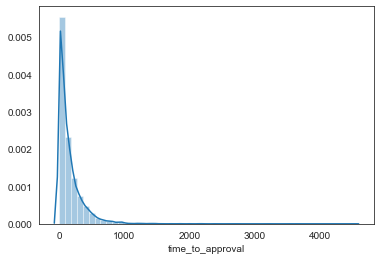

In [77]:
sns.distplot(pv_df["time_to_approval"])

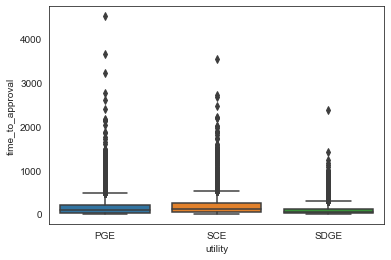

In [78]:
sns.boxplot(x="utility",y="time_to_approval",data=pv_df)

In [83]:
pv_df = pv_df[pv_df['time_to_approval'] <= 1000]

In [85]:
pv_df["time_to_approval"].max()

998.0

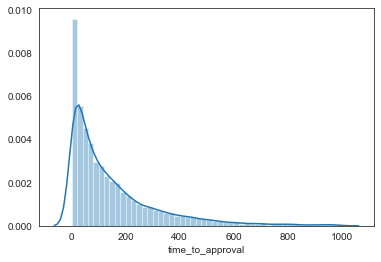

In [86]:
sns.distplot(pv_df["time_to_approval"])

In [89]:
pv_df["service county"].value_counts()

SAN DIEGO          4150
Los Angeles        2476
FRESNO             1571
San Bernardino     1452
Riverside          1245
                   ... 
San Luis Obispo       1
Santa barbara         1
Santa Clara           1
Sonoma                1
SIERRA                1
Name: service county, Length: 72, dtype: int64